In [33]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
import numpy as np

Suppose our signal is limited to frequencies $-0.5 \leq f \leq 0.5$. Suppose our time series is 51 points long.

In [48]:
WW = 0.5
TT = 51

Text(0.5, 0, 'Sample')

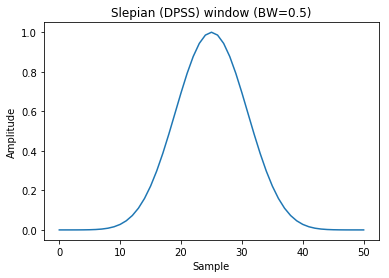

In [49]:
window = signal.slepian(TT, width=WW)

plt.plot(window)
plt.title("Slepian (DPSS) window (BW={})".format(WW))
plt.ylabel("Amplitude")
plt.xlabel("Sample")

In [36]:
A = fft(window, 50000) / (len(window)/2.0)
freq = np.linspace(-1, 1, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))

C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


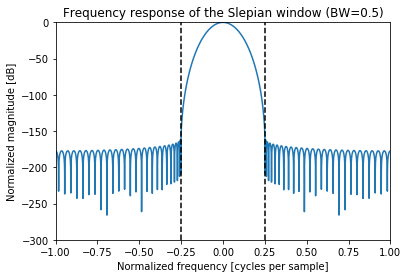

In [47]:
plt.figure()
plt.plot(freq, response)
plt.axis([-1, 1, -300, 0])
plt.title("Frequency response of the Slepian window (BW={})".format(WW))
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.axvline(-WW/2, color='k', ls='--')
plt.axvline(WW/2, color='k', ls='--')